In [3]:
from traffic.core import Traffic

trajs = Traffic.from_file('/cluster/home/krum/github/VT2_airspace_complexity/data/rectangle_Switzerland/03_preprocessed/preprocessed_all.parquet')

In [4]:
df = trajs.data
df = df.groupby('flight_id')['timestamp'].agg(['min', 'max']).reset_index()
df = df.rename({'min': 'in', 'max': 'out'}, axis=1)
df['stay_h'] = (df['out'] - df['in']).dt.total_seconds()/3600
df['timestamp_entered_h'] = df['in'].dt.floor('h')
df = df.drop(['in','out'], axis=1)

In [15]:
import pandas as pd

hourly_stay = df.groupby(['timestamp_entered_h'])['stay_h'].sum()
hourly_users = df.groupby(['timestamp_entered_h'])['flight_id'].count()
hourly_df = pd.concat([hourly_users, hourly_stay], axis=1)#.reset_index()
hourly_df = hourly_df.rename({'flight_id': 'count'}, axis=1)

Text(0, 0.5, 'Number of flights')

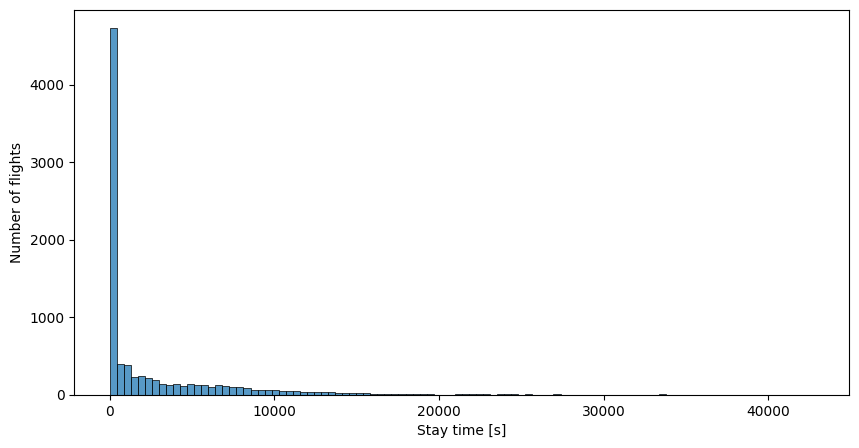

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=hourly_df, x='stay_h', ax=ax, bins=100)
ax.set_xlabel('Stay time [s]')
ax.set_ylabel('Number of flights')

In [17]:
hourly_df.reset_index(inplace=True)
hourly_df

,timestamp_entered_h,count,stay_h
0,2019-01-01 00:00:00+00:00,5,1.061111
1,2019-01-01 01:00:00+00:00,2,0.719444
2,2019-01-01 02:00:00+00:00,5,1.658333
3,2019-01-01 03:00:00+00:00,12,4.569444
4,2019-01-01 04:00:00+00:00,28,7591.223611
...,...,...,...
8727,2019-12-30 19:00:00+00:00,160,39.504167
8728,2019-12-30 20:00:00+00:00,185,44.254167
8729,2019-12-30 21:00:00+00:00,122,27.909722
8730,2019-12-30 22:00:00+00:00,49,11.805556


Text(0.5, 1.0, 'Average stay time per weekday')

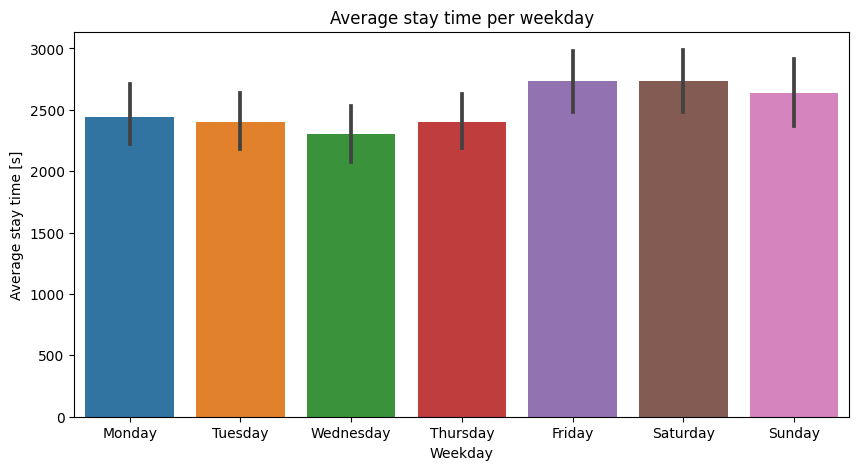

In [18]:
hourly_df['weekday'] = hourly_df['timestamp_entered_h'].dt.day_name()
# get average stay_s per weekday starting with Monday and plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=hourly_df, x='weekday', y='stay_h', ax=ax, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Average stay time [s]')
ax.set_title('Average stay time per weekday')

In [25]:
hourly_df['month'] = hourly_df['timestamp_entered_h'].dt.month
hourly_df['hour'] = hourly_df['timestamp_entered_h'].dt.hour
hourly_df

,timestamp_entered_h,count,stay_h,weekday,month,hour
0,2019-01-01 00:00:00+00:00,5,1.061111,Tuesday,1,0
1,2019-01-01 01:00:00+00:00,2,0.719444,Tuesday,1,1
2,2019-01-01 02:00:00+00:00,5,1.658333,Tuesday,1,2
3,2019-01-01 03:00:00+00:00,12,4.569444,Tuesday,1,3
4,2019-01-01 04:00:00+00:00,28,7591.223611,Tuesday,1,4
...,...,...,...,...,...,...
8727,2019-12-30 19:00:00+00:00,160,39.504167,Monday,12,19
8728,2019-12-30 20:00:00+00:00,185,44.254167,Monday,12,20
8729,2019-12-30 21:00:00+00:00,122,27.909722,Monday,12,21
8730,2019-12-30 22:00:00+00:00,49,11.805556,Monday,12,22


In [42]:
mean_count = hourly_df['count'].mean()
median_count = hourly_df['count'].median()
percentile_40 = hourly_df['count'].quantile(0.4)

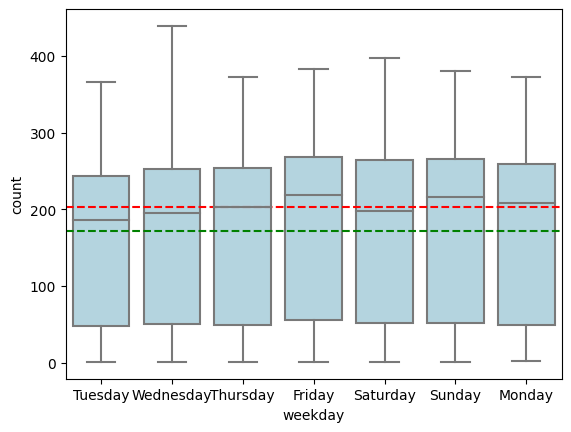

In [48]:
ax = sns.boxplot(x="weekday", y="count", data=hourly_df, showfliers=False, color='lightblue')
ax.axhline(median_count, ls='--', color='red')
ax.axhline(percentile_40, ls='--', color='green')

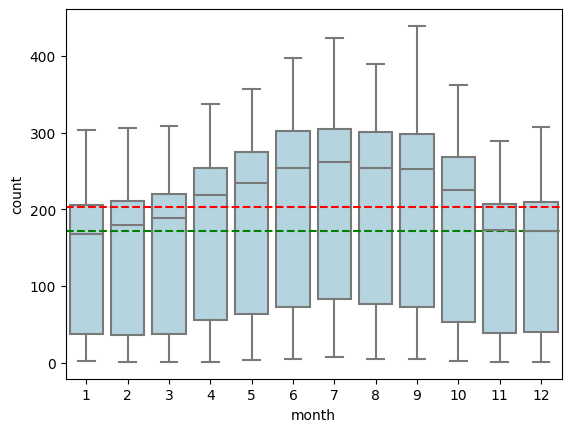

In [49]:
ax = sns.boxplot(x="month", y="count", data=hourly_df, showfliers=False, color='lightblue')
ax.axhline(median_count, ls='--', color='red')
ax.axhline(percentile_40, ls='--', color='green')

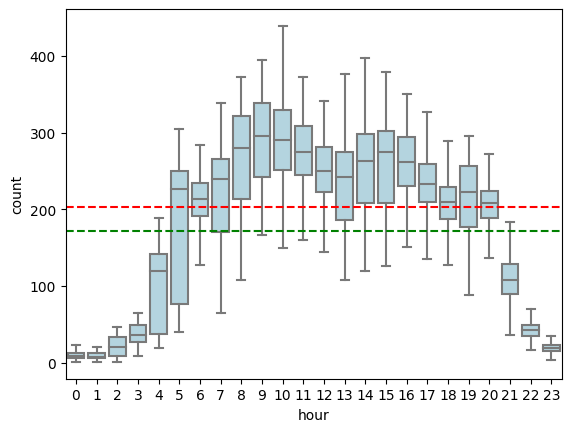

In [45]:
ax = sns.boxplot(x="hour", y="count", data=hourly_df, showfliers=False, color='lightblue')
# add horizontal line for median
ax.axhline(median_count, ls='--', color='red')
ax.axhline(percentile_40, ls='--', color='green')